In [8]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
db = sqlite3.connect('claims.db')


In [2]:
denominator = pd.read_sql_query('''SELECT doctor_id, COUNT(*) AS denominator
FROM medical_headers 

Where ('211.4' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25)              
OR '211.3' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25)
AND '152.%' not in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25))
GROUP BY doctor_id''',db)


In [3]:
numerator = pd.read_sql_query('''SELECT doctor_id, COUNT(*) AS numerator
                        FROM medical_headers

WHERE ((('211.4' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25)              
OR '211.3' in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25))
AND '152.%' not in (D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,
                  D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,
                 D21,D22,D23,D24,D25))
AND ('45.23' in (P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
                P11,P12,P13,P14,P15)
    OR '45.7%' in (P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
                P11,P12,P13,P14,P15)
    OR '45.%' in (P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
                P11,P12,P13,P14,P15)
    OR encounter_key in (SELECT encounter_key
                        FROM medical_service_lines
                        WHERE procedure in ('45378', '45388', '44110', '45380',
                '45381', '45382', '45383', '45384', '45385',
                '44150', '44151', '44152', '44153', '44154', 
                '44155', '44156', '44157', '44158', '44159', 
                '44160', '44204', '44205', '44206', '44207', 
                '44208', '44210', '44211', '44212', '44146'))))
GROUP BY doctor_id''',db)

In [4]:
doctor_rate = numerator.merge(denominator, how='right', on='doctor_id')

In [5]:
doctor_rate['rate_of_unneccarry_procedures'] = doctor_rate.numerator / doctor_rate.denominator

In [7]:
doctor_rate.fillna(0)

,doctor_id,numerator,denominator,rate_of_unneccarry_procedures
0,0053f157450476af69c501f39e8780d7cea30aafbfb9a2...,6.0,8,0.7500
1,006764cf23e7df5bf91511cf1c2c78903ee7c1683a936d...,1.0,1,1.0000
2,0067c410b32482e2e46323b01a592300a87c9ae54b5ab4...,1.0,1,1.0000
3,007a1afad99071d1f2cc5baeacaee818a604d689744e55...,12.0,12,1.0000
4,00d2da293998cebb9a57036a2a914dbba4e96e4e272e6c...,1.0,1,1.0000
5,00d869e44e2a6fb384552b7eaec439bb4f4390dfda2217...,1.0,1,1.0000
6,010a2d44fb509a52076a97b56132326b7b792da6e8017e...,1.0,1,1.0000
7,01324f85867eee3b706f934c90d2cf1b9aa998b8401e0b...,2.0,2,1.0000
8,0139ffe055a33b965049c60a0361ca6960ab1cd5eb0ec0...,16.0,16,1.0000
9,01469d5cbaa6e581fd5cfb42d19dd9f2edfc52178924e8...,2.0,2,1.0000


Text(0, 0.5, 'Total Surgeries Performed')

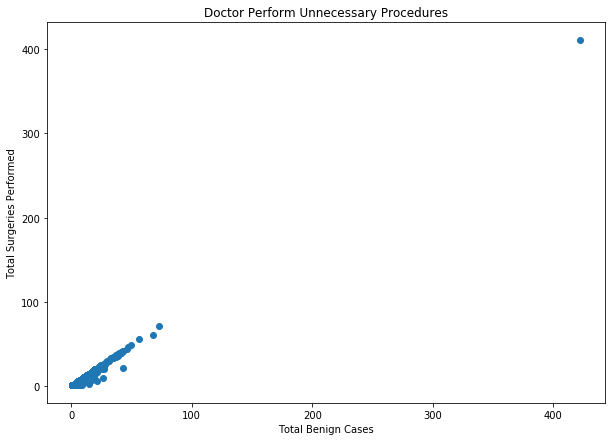

In [12]:
# plot
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures')

plt.scatter(doctor_rate['denominator'],doctor_rate['numerator'], label = 'doctors_performance_rate')
plt.xlabel('Total Benign Cases')
plt.ylabel('Total Surgeries Performed')

In [13]:
doctor_rate.denominator.max()

422

In [14]:
doctor_rate.numerator.max()

411.0

In [20]:
doctor_rate.loc[422]

doctor_id                        45975c1f8922df0bb6fb15cdbbfeb4dc802c7e17ccf56b...
numerator                                                                        1
denominator                                                                      1
rate_of_unneccarry_procedures                                                    1
Name: 422, dtype: object

In [18]:
doctor_rate.head()

,doctor_id,numerator,denominator,rate_of_unneccarry_procedures
0,0053f157450476af69c501f39e8780d7cea30aafbfb9a2...,6.0,8,0.75
1,006764cf23e7df5bf91511cf1c2c78903ee7c1683a936d...,1.0,1,1.00
2,0067c410b32482e2e46323b01a592300a87c9ae54b5ab4...,1.0,1,1.00
3,007a1afad99071d1f2cc5baeacaee818a604d689744e55...,12.0,12,1.00
4,00d2da293998cebb9a57036a2a914dbba4e96e4e272e6c...,1.0,1,1.00


In [24]:
df1 = doctor_rate.loc[doctor_rate["denominator"] <=40 ]


Text(0, 0.5, 'Total Surgeries Performed')

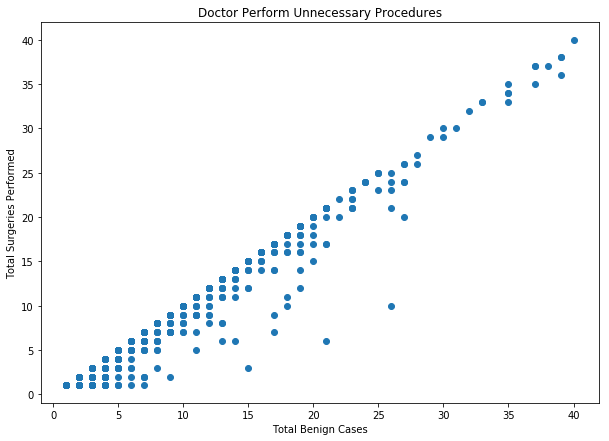

In [25]:
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures')

plt.scatter(df1['denominator'],df1['numerator'])
plt.xlabel('Total Benign Cases')
plt.ylabel('Total Surgeries Performed')

Text(0, 0.5, 'Percentage of Surgeries Performed')

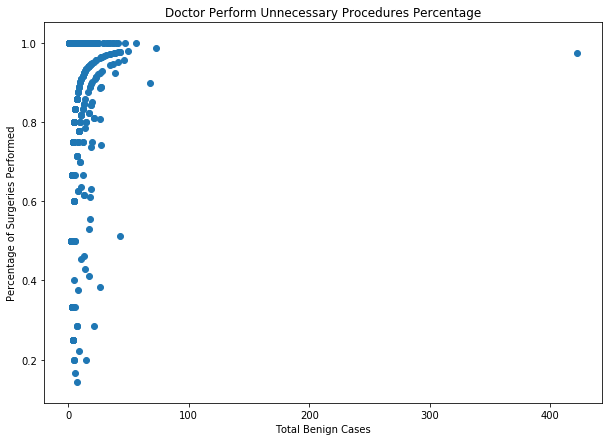

In [27]:
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures Percentage')

plt.scatter(doctor_rate['denominator'],doctor_rate['rate_of_unneccarry_procedures'])
plt.xlabel('Total Benign Cases')
plt.ylabel('Percentage of Surgeries Performed')

Text(0, 0.5, 'Percentage of Surgeries Performed')

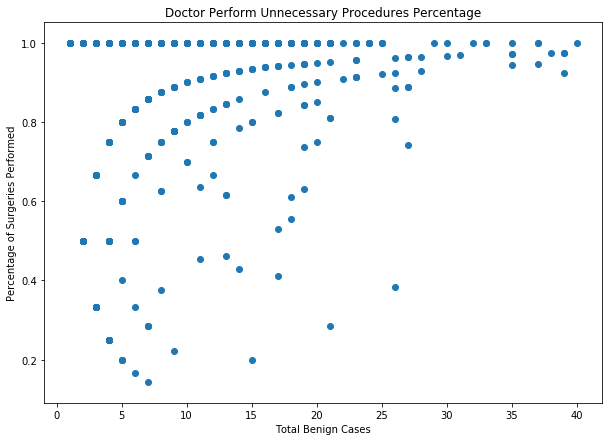

In [28]:
plt.figure(figsize = (10,7))
plt.title('Doctor Perform Unnecessary Procedures Percentage')

plt.scatter(df1['denominator'],df1['rate_of_unneccarry_procedures'])
plt.xlabel('Total Benign Cases')
plt.ylabel('Percentage of Surgeries Performed')